In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from dataset import SNPmarkersDataset
from bed_reader import open_bed
import matplotlib.pyplot as plt

# Dataset validation

Goal here is to check that the dataset classes correctly map the SNP to the phenotypes

In [2]:
train_dataset = SNPmarkersDataset(mode="train")
validation_dataset = SNPmarkersDataset(mode="validation")
test_dataset = SNPmarkersDataset(mode="test")

raw_data = open_bed("../Data/BBBDL_BBB2023_MD.bed").read(dtype="int8")
raw_pheno_df = pd.read_csv("../Data/BBBDL_pheno_20000bbb_6traits_processed.csv", index_col=1)
raw_pheno_df = raw_pheno_df.drop(["col_1"], axis = 1)

In [3]:
# Check that data is free of missing values
classes, counts = np.unique(raw_data, return_counts=True)
if classes.all() != np.array([0, 1, 2]).all():
    raise Exception(f"There are {counts[np.where(classes == -127)[0][0]]} missing values in the data!")

dataset_len = len(train_dataset) + len(validation_dataset) + len(test_dataset) 
if dataset_len != raw_data.shape[0]:
    raise Exception("The sum of all three dataset doesn't match the size of the raw_data")

for i in range(dataset_len):
    if i < len(train_dataset):
        in_dataset_index = i
        target_dataset = train_dataset
    elif i < len(train_dataset) + len(validation_dataset):
        in_dataset_index = i - len(train_dataset)
        target_dataset = validation_dataset
    else:
        in_dataset_index = i - (len(train_dataset) + len(validation_dataset))
        target_dataset = test_dataset
    
    if raw_data[i].all() != target_dataset[in_dataset_index][0].all():
        raise Exception(f"The raw SNP data for the index {i} doesn't match")

    if not raw_pheno_df.iloc[i].compare(target_dataset[in_dataset_index][1]).empty:
        raise Exception(f"The phenotype data for the index {i} doesn't match")

print("Comparaison finished sucessfully")


Comparaison finished sucessfully


# Phenotype histogram visualisation

In [17]:
import json

test = {
    "test": np.ones((2,3)).tolist()
}
with open("test.json", "w") as f:
    json.dump(test, f)

In [18]:
validation_dataset.pheno.drop(["pheno_5", "pheno_6"], axis = 1).dropna()

,pheno_1,pheno_2,pheno_3,pheno_4
id,,,,
BBB2024_13331,6.605611,10.269402,4.475572,4.634891
BBB2024_13332,2.816196,3.000486,2.991729,3.026090
BBB2024_13333,4.189986,4.668841,3.048993,4.010335
BBB2024_13334,5.190196,6.612275,3.643505,3.734786
BBB2024_13335,3.190196,5.612275,4.643505,4.734786
...,...,...,...,...
BBB2024_14495,5.230408,5.446104,3.681925,4.026385
BBB2024_14496,5.290739,7.853188,2.901779,3.033066
BBB2024_14497,1.305410,4.957560,0.496434,-0.568179


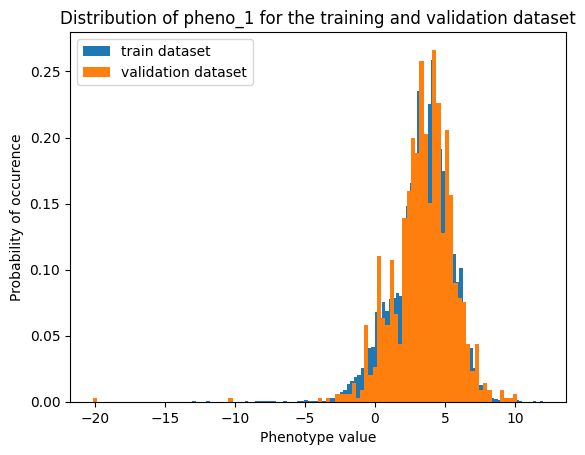

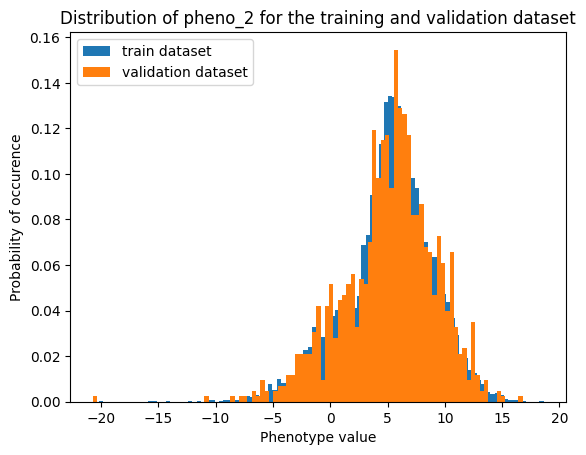

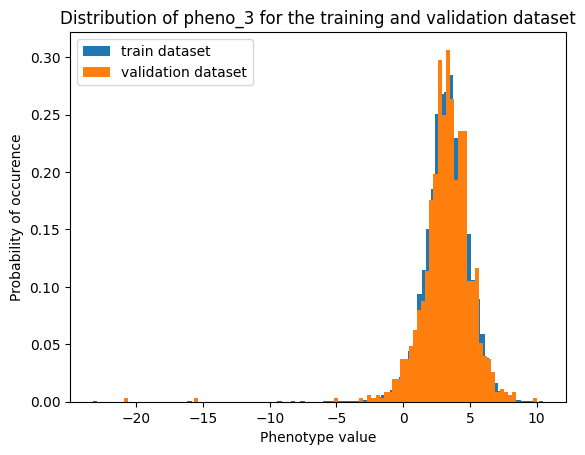

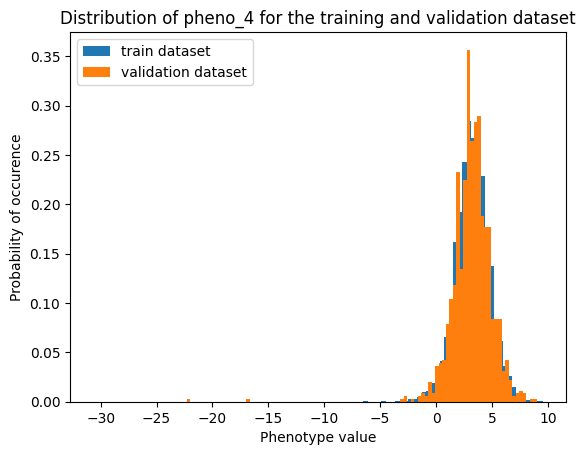

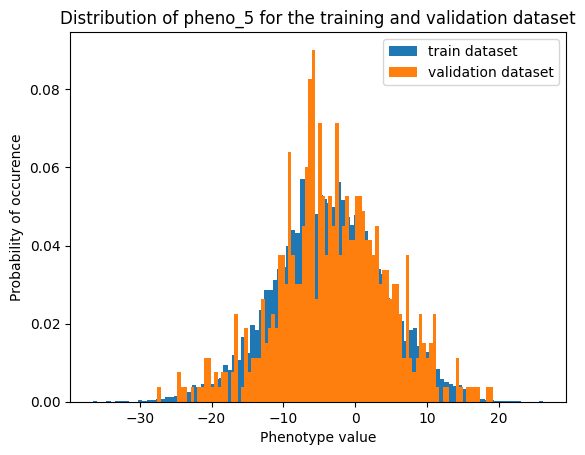

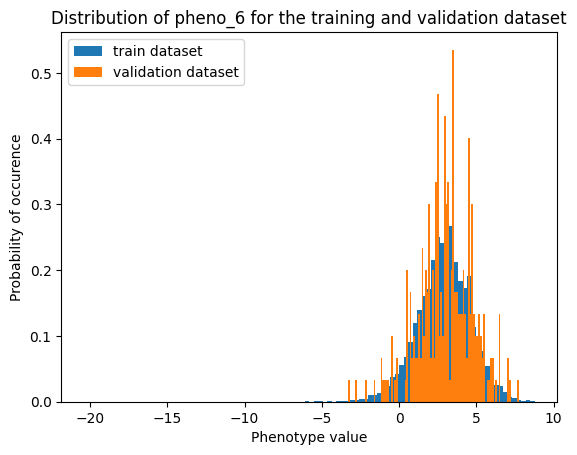

In [5]:
plt.hist(train_dataset.pheno["pheno_1"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_1"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability of occurence")
plt.title("Distribution of pheno_1 for the training and validation dataset")
plt.show()

plt.hist(train_dataset.pheno["pheno_2"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_2"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.ylabel("Probability of occurence")
plt.xlabel("Phenotype value")
plt.title("Distribution of pheno_2 for the training and validation dataset")
plt.show()

plt.hist(train_dataset.pheno["pheno_3"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_3"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.ylabel("Probability of occurence")
plt.xlabel("Phenotype value")
plt.title("Distribution of pheno_3 for the training and validation dataset")
plt.show()

plt.hist(train_dataset.pheno["pheno_4"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_4"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability of occurence")
plt.title("Distribution of pheno_4 for the training and validation dataset")
plt.show()

plt.hist(train_dataset.pheno["pheno_5"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_5"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability of occurence")
plt.title("Distribution of pheno_5 for the training and validation dataset")
plt.show()

plt.hist(train_dataset.pheno["pheno_6"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_dataset.pheno["pheno_6"].dropna(), bins=100, density=True, label = "validation dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability of occurence")
plt.title("Distribution of pheno_6 for the training and validation dataset")
plt.show()